### Data visualization

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [55]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("tab20b")

palette='tab20b'
title_fontsize = '25'

In [56]:
image_folder_path = '../images/aculei-images/'
csv_path = '../datasets/aculei.csv'

In [57]:
df = pd.read_csv(csv_path, index_col=0)

In [58]:
df['camera'].value_counts()

CAM_1    9076
CAM_4    2764
CAM_6    1485
CAM_3     995
CAM_5     811
CAM_7     367
CAM_2     188
Name: camera, dtype: int64

In [59]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [60]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

### Some insigths about the data

In [61]:
df.shape

(16874, 7)

In [62]:
df.sample(5)

,image_name,camera,date_time,date,time,moon,temp
7656,TF_ACULEI_8456_DSCF0523.jpg,CAM_1,2021-07-24 23:45:50,2021-07-24,23:45:50,Full Moon,25°C
4476,TF_ACULEI_8995_DSCF0043.jpg,CAM_2,2021-08-07 23:48:24,2021-08-07,23:48:24,New Moon,19°C
15065,TF_ACULEI_14977_DSCF0034.jpg,NaN,2023-03-08 06:55:12,2023-03-08,06:55:12,Full Moon,6°C
1440,TF_ACULEI_5790_DSCF6109.jpg,CAM_1,2021-06-22 03:02:11,2021-06-22,03:02:11,Waxing Gibbous,19°C
8820,TF_ACULEI_358_IMAG0036.jpg,CAM_3,2021-05-23 05:01:34,2021-05-23,05:01:34,Waxing Gibbous,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 7971 to 16622
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   image_name  16874 non-null  object        
 1   camera      15686 non-null  object        
 2   date_time   16862 non-null  datetime64[ns]
 3   date        16862 non-null  object        
 4   time        16862 non-null  object        
 5   moon        16862 non-null  object        
 6   temp        10457 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.0+ MB


In [64]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera        1188
date_time       12
date            12
time            12
moon            12
temp          6417
dtype: int64


In [65]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

CAM_1    9076
CAM_4    2764
CAM_6    1485
CAM_3     995
CAM_5     811
CAM_7     367
CAM_2     188
Name: camera, dtype: int64


In [66]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [67]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2704
First Quarter      2620
Waxing Gibbous     2125
Waning Crescent    2052
Waning Gibbous     2045
Last Quarter       1873
New Moon           1774
Waxing Crescent    1669
Name: moon, dtype: int64


### Data visualization

In [68]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [69]:
df.head()

,image_name,camera,date_time,date,time,moon,temp,month,year,day
7971,TF_ACULEI_7870_DSCF0161.jpg,CAM_1,2021-07-15 01:26:31,2021-07-15,01:26:31,Waxing Crescent,NaN,2021-07,2021,2021-07-15
13884,TF_ACULEI_6234_DSCF6577.jpg,CAM_1,2021-06-25 00:33:51,2021-06-25,00:33:51,Full Moon,NaN,2021-06,2021,2021-06-25
13947,TF_ACULEI_6256_DSCF6599.jpg,CAM_1,2021-06-25 00:38:36,2021-06-25,00:38:36,Full Moon,22°C,2021-06,2021,2021-06-25
12896,TF_ACULEI_6274_DSCF6617.jpg,CAM_1,2021-06-25 00:41:45,2021-06-25,00:41:45,Full Moon,NaN,2021-06,2021,2021-06-25
2655,TF_ACULEI_6250_DSCF6593.jpg,CAM_1,2021-06-25 00:37:30,2021-06-25,00:37:30,Full Moon,22°C,2021-06,2021,2021-06-25


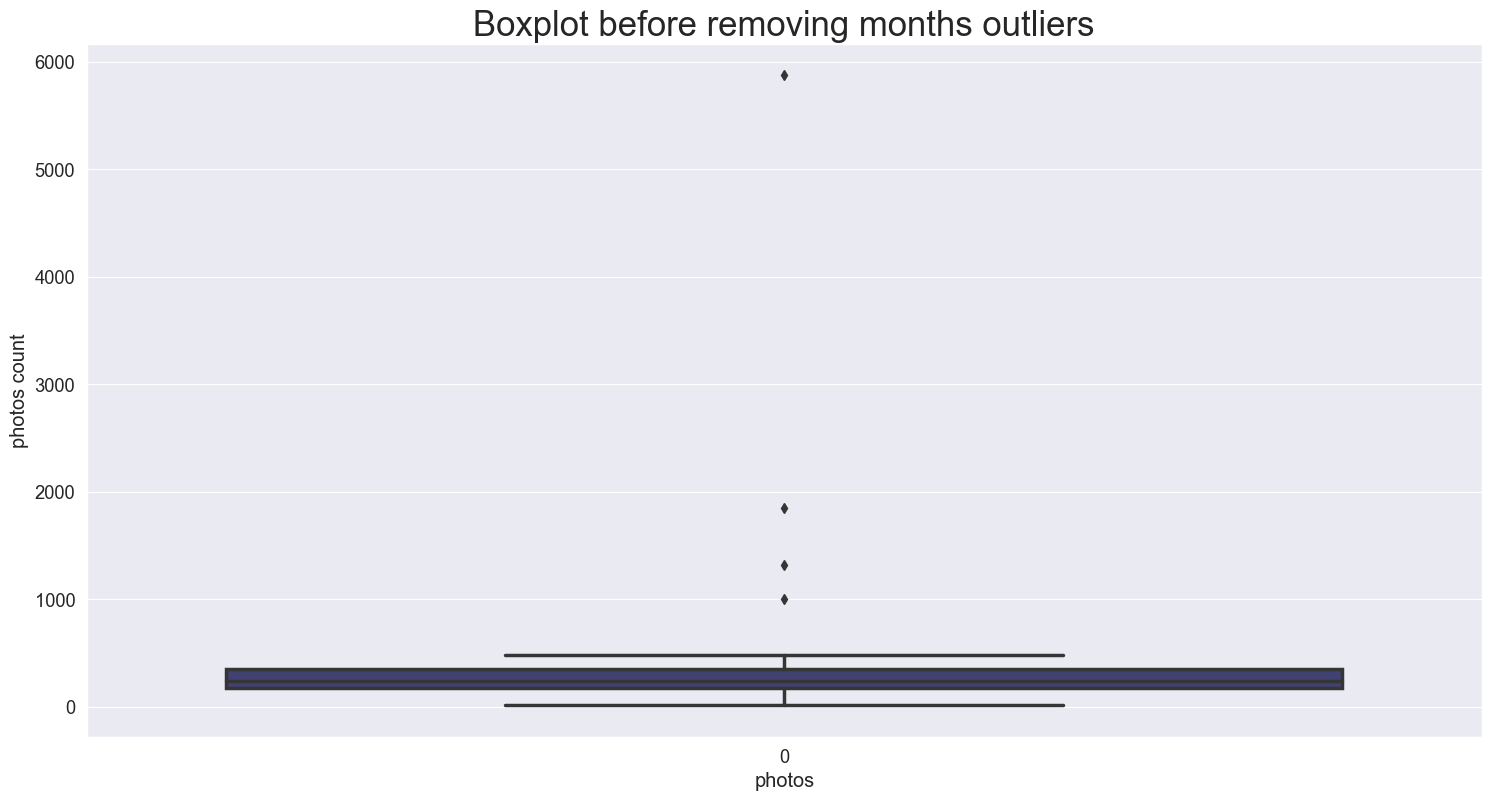

In [70]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [71]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

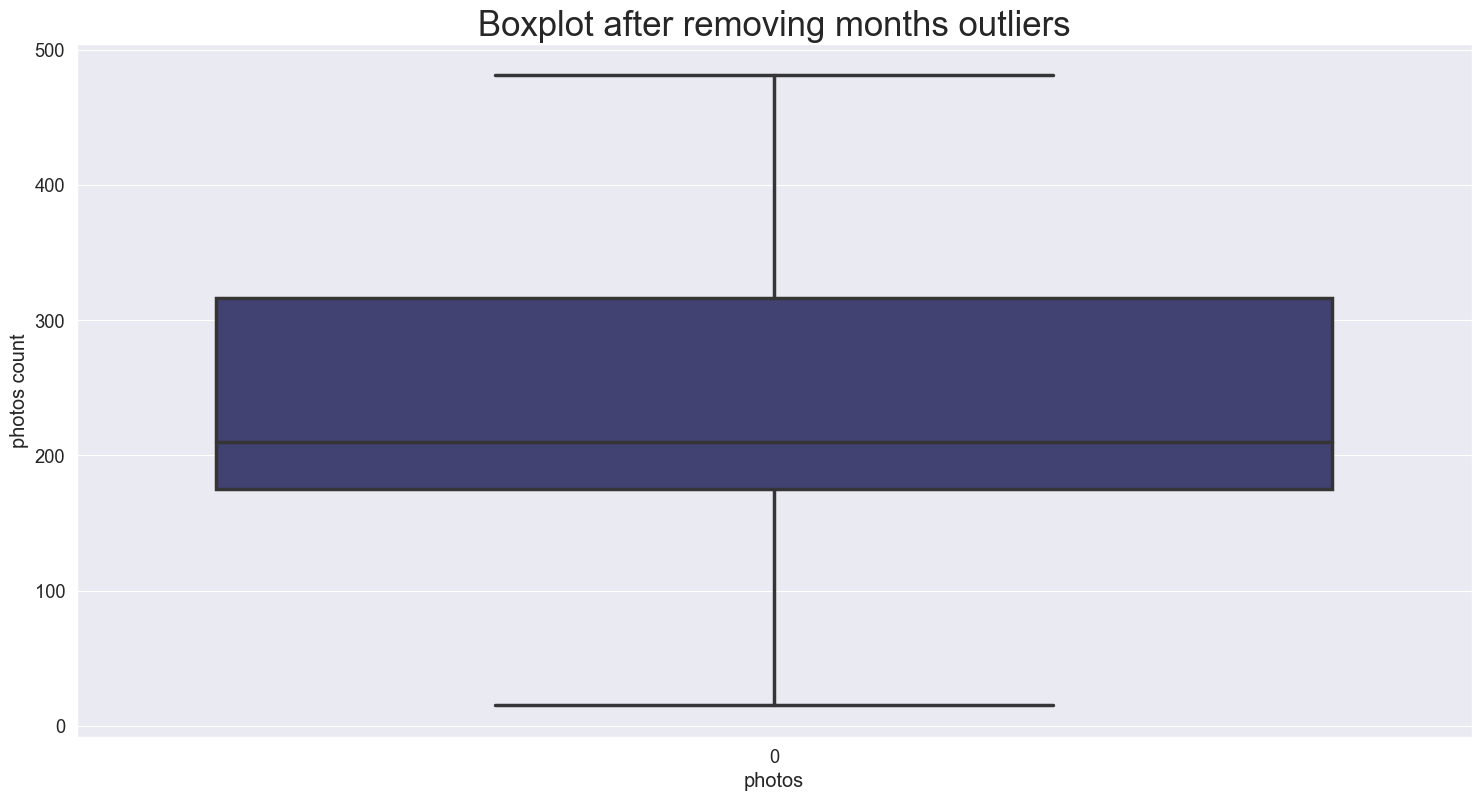

In [72]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

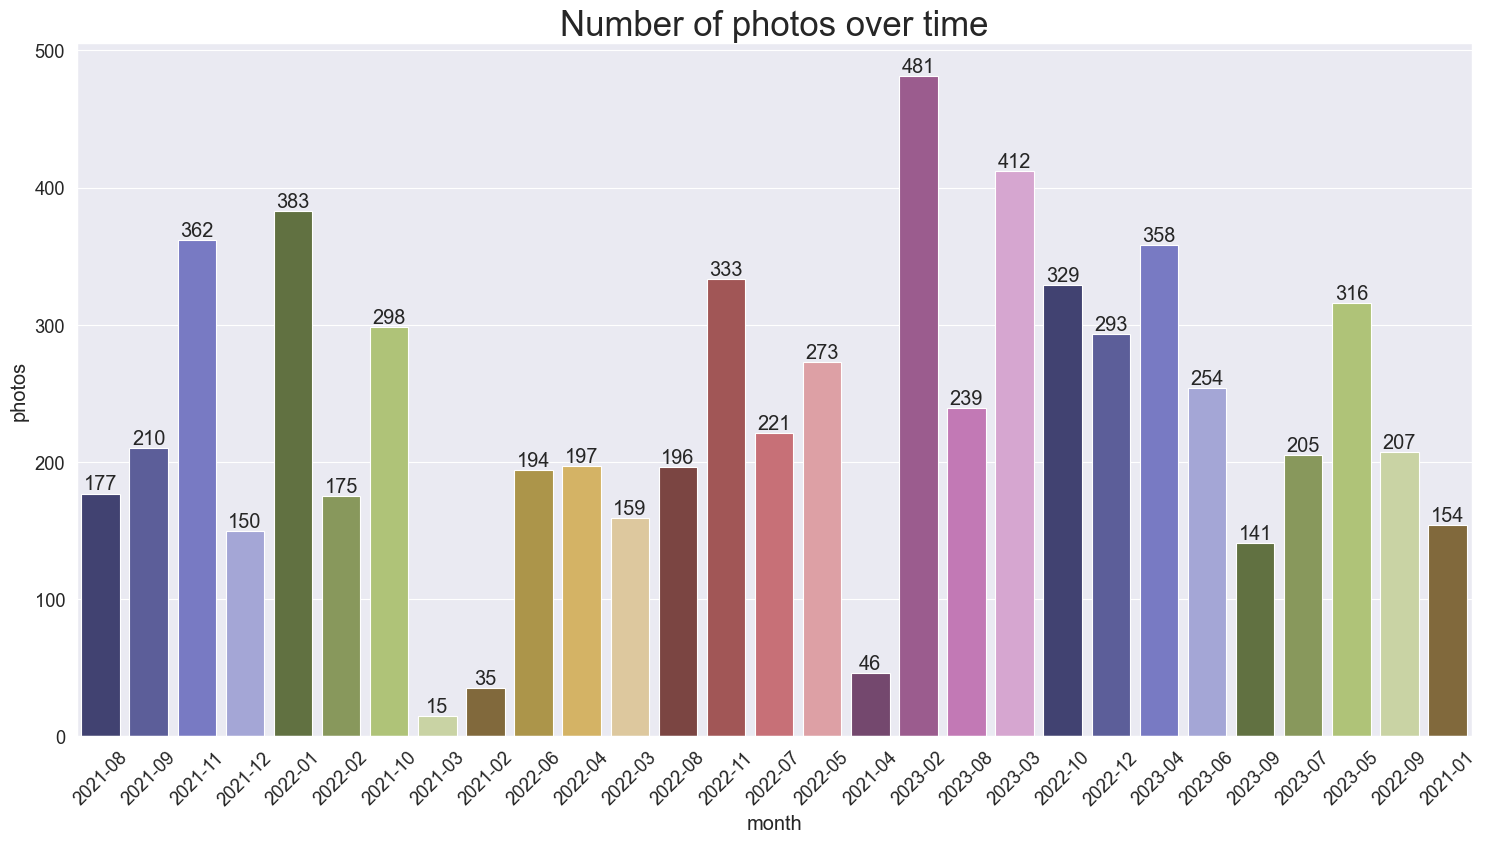

In [73]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', palette=palette)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

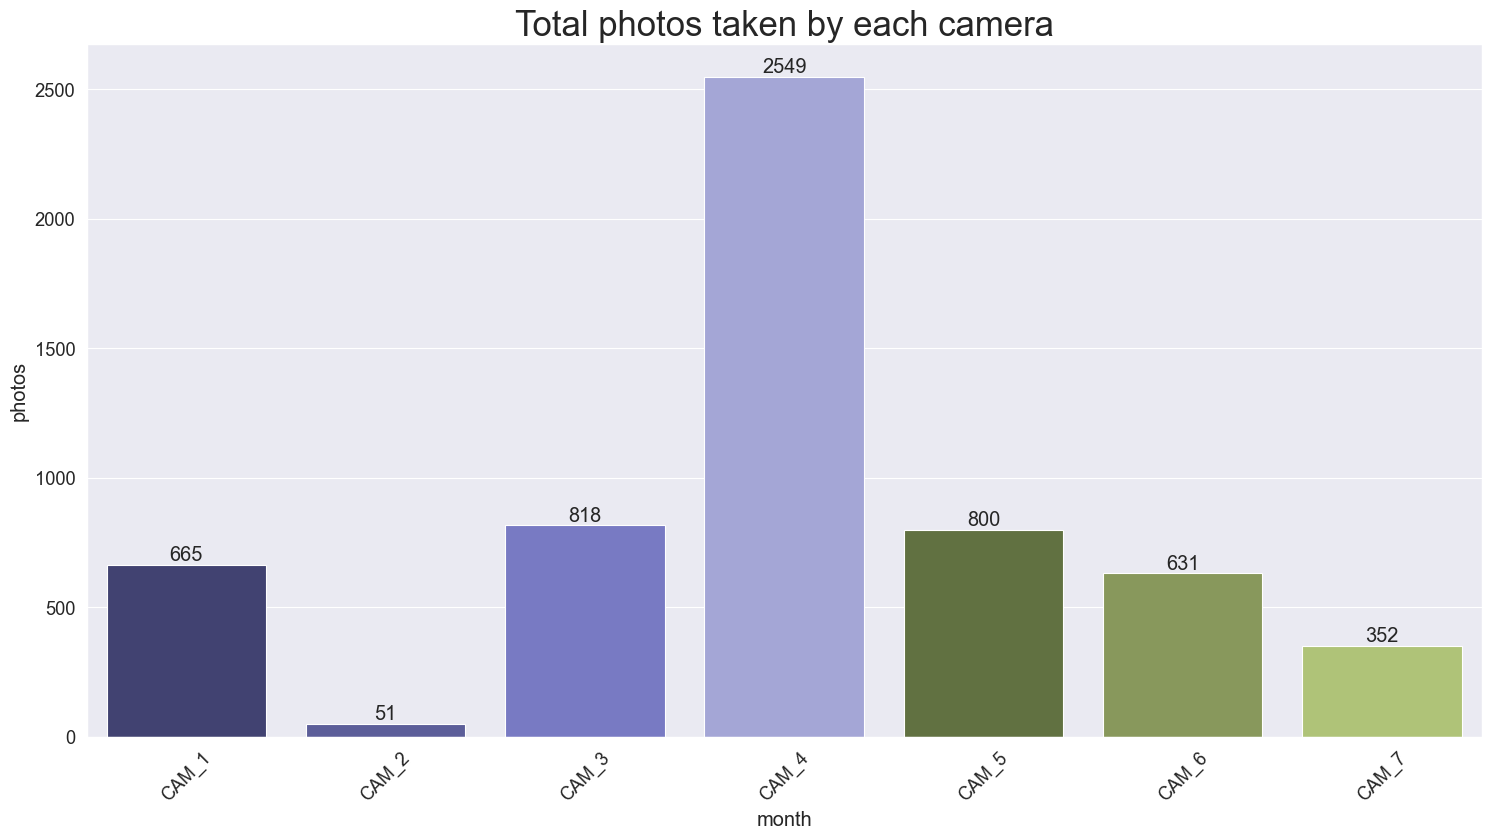

In [74]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

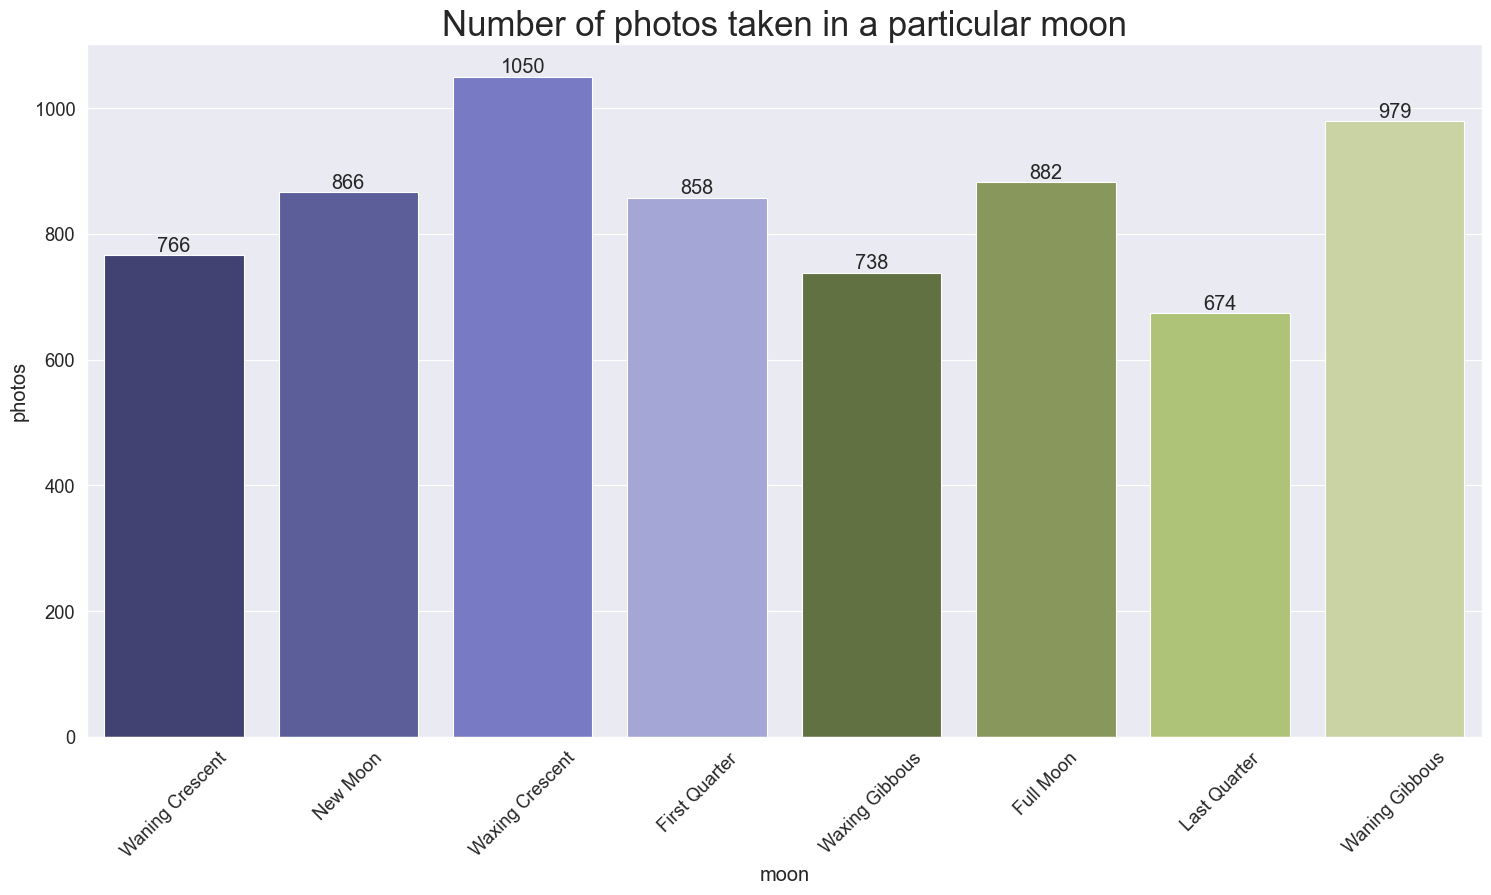

In [75]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon')

plt.title('Number of photos taken in a particular moon', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

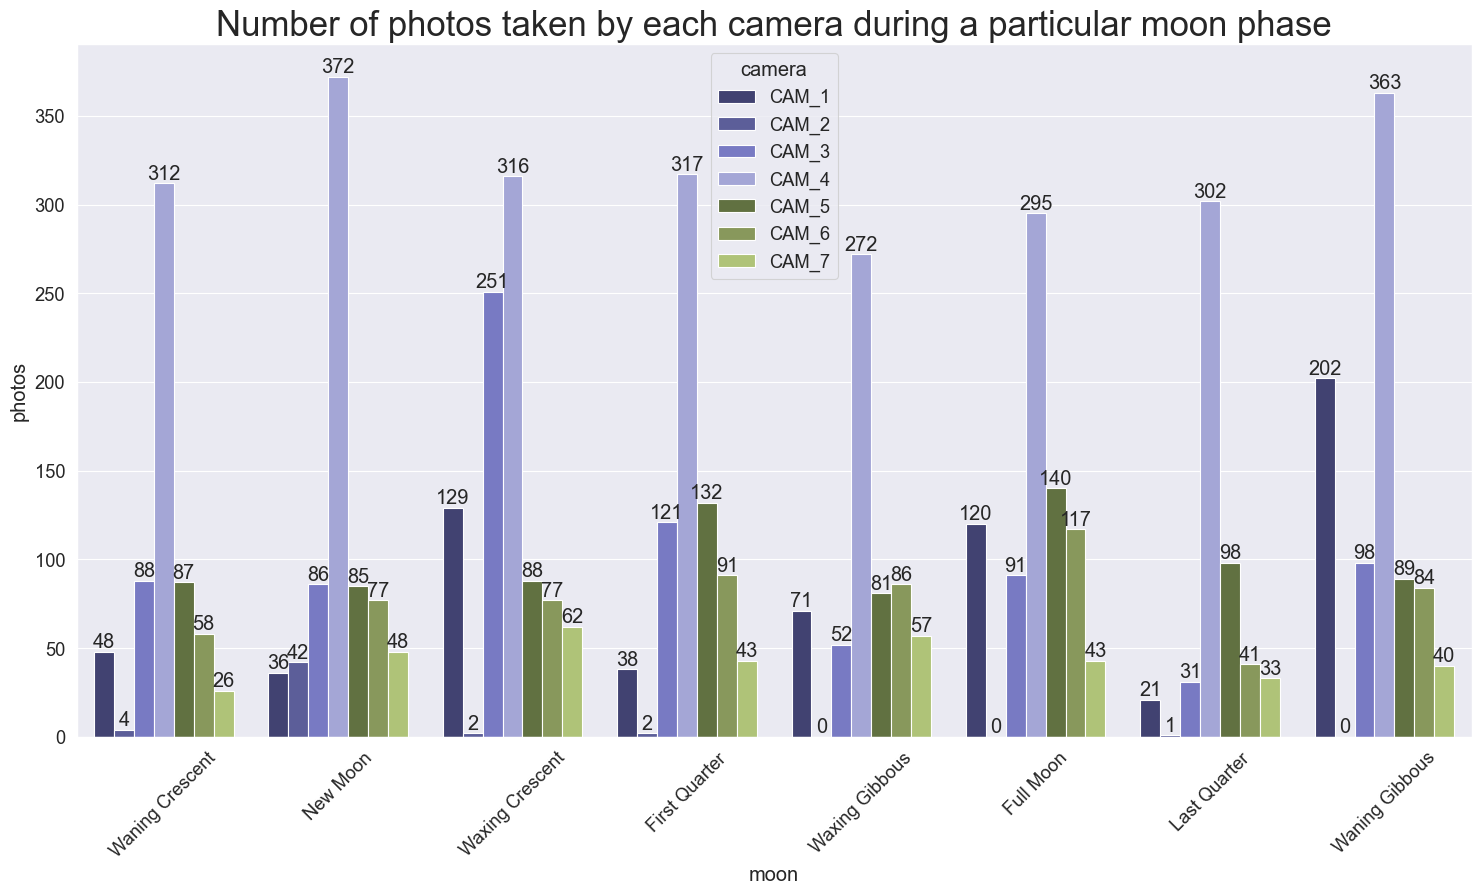

In [76]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera')

plt.title('Number of photos taken by each camera during a particular moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

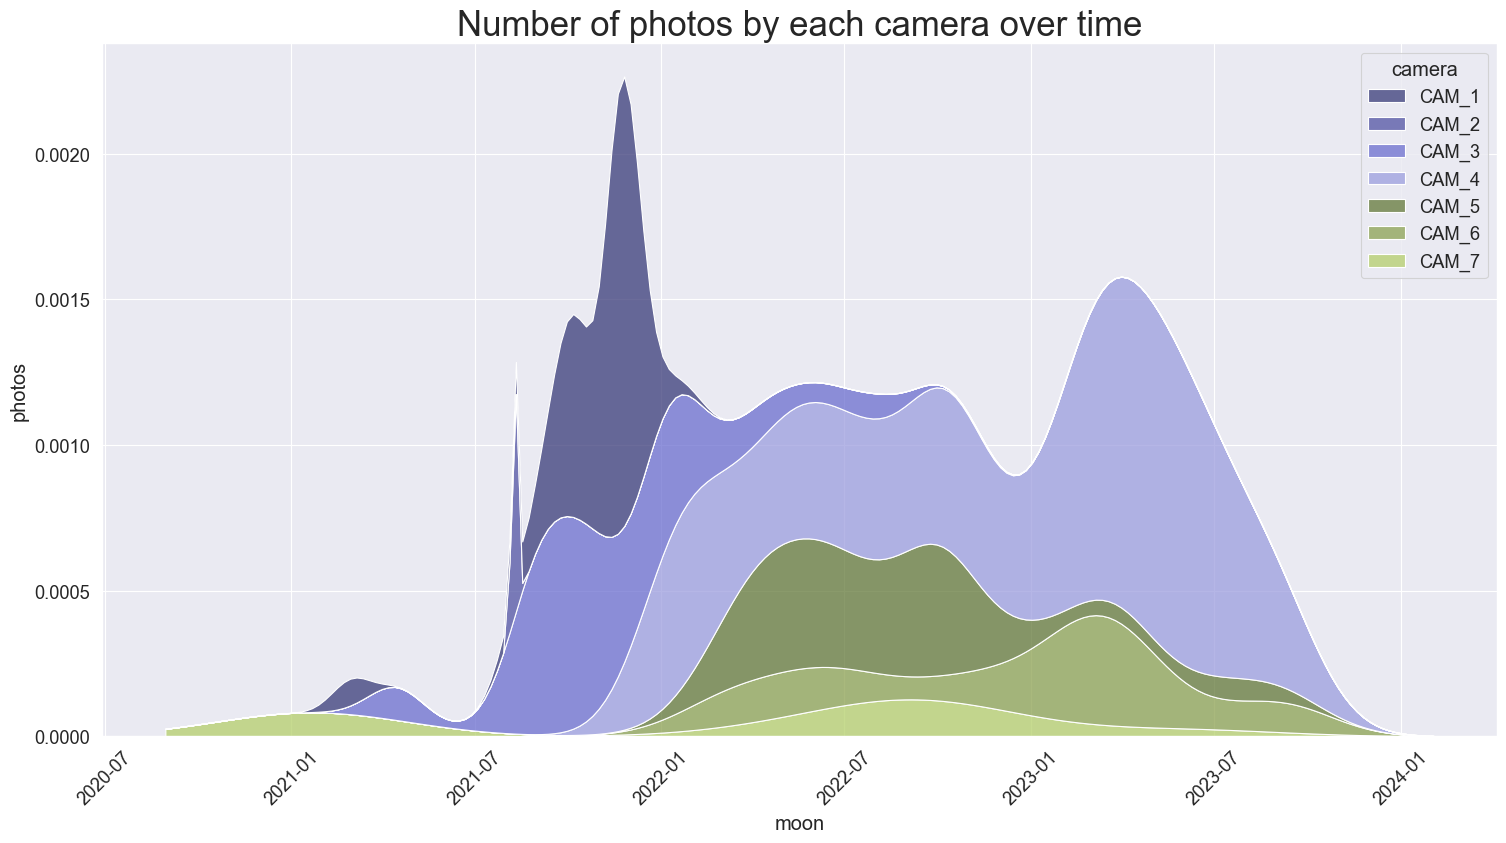

In [77]:
plt.figure(figsize=(18, 9))
sns.kdeplot(data=df, x="date_time", hue="camera", multiple="stack")

plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

plt.show()


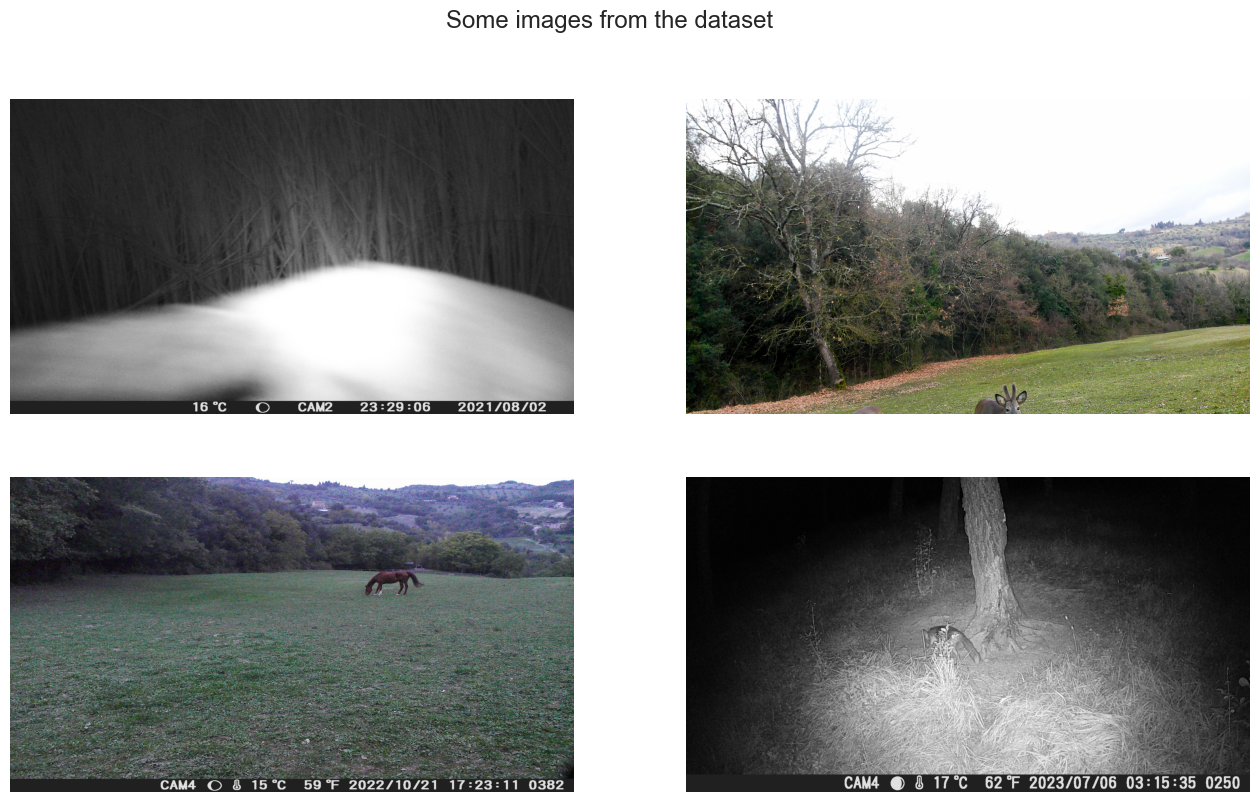

In [78]:
import random

four_random_images = df['image_name'].sample(n=4, random_state=random.seed()).tolist()
paths = [os.path.join(image_folder_path, image) for image in four_random_images]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle('Some images from the dataset')

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    image = Image.open(paths[i])
    ax.imshow(image, aspect='auto')
    ax.axis('off')

plt.show()